# 1 Getting started

This notebbok will help you take first step in learning Image Processing and Computer Vision using OpenCV.
* Reading an Image
* Check image attributes like datatype ans shape
* Matrix representation of an image in numpy
* Color Images and splitting/merging image channels
* Displaying images using matplotlib
* Saving images

## General function for image
#### Display image with Image library
* Image(filename="name of file")
#### Read image as gray scale
* img = cv2.imread("image_name", 0)   0 is flag
#### Printing size of image
* img.shape
#### Printing data-type of image
* img.dtype
#### Display image using matplotlib
* plt.imshow(img)
#### Seting color map to gray scale for proper rendering.
* plt.imshow(img, cmap="gray")
#### Splitting color channels of image
* b, g, r = cv2.split(img)
#### Merging the different color channels
* imgMerged = cv2.merge((b, g, r))
#### Converting different color spaces
* cv2.cvtColor(src, code)
#### Saving image
* cv2.imwrite(filename, img)

### Importing libraries

In [8]:
import numpy as np
import matplotlib.pyplot as plt

from IPython.display import Image
import cv2

#### Read image as gray scale.

In [46]:
img = cv2.imread('Images/image11.png', 0)

#### Print the image data (pixel values), element of 2D numpy array
#### Each pixel value is 8-bits [0,255]

In [12]:
print(img)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [255 255 255 ... 255 255 255]]


#### Print the size of image.

In [13]:
print("Image size (H, W) is:", img.shape)

Image size (H, W) is: (257, 214)


#### Print the data-type of image

In [14]:
print("Data type of image is:", img.dtype)

Data type of image is: uint8


## Display Images using Matplotlib

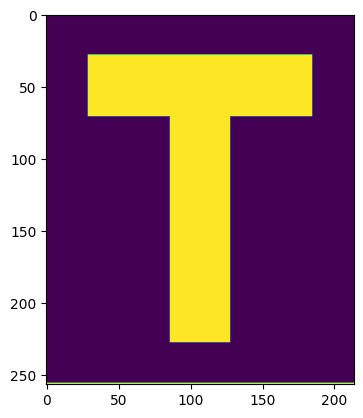

In [15]:
# Display image

plt.imshow(img)

### Problem with matplotlib
* Even though the image was read in as a gray scale image, it won't neccessarily display in gray scale when using 'imshow()'. Matplotlib uses diffent color maps and its possible that the gray scale color map is not set. 

#### Set color map to gray scale for proper rendering.

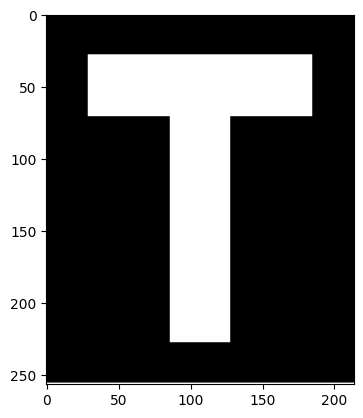

In [17]:
plt.imshow(img, cmap='gray')

In [18]:
# Another example

In [19]:
# Read image as gray scale.
img_2 = cv2.imread('Images/Github.png', 0)

In [20]:
# Print image
print(img_2)

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


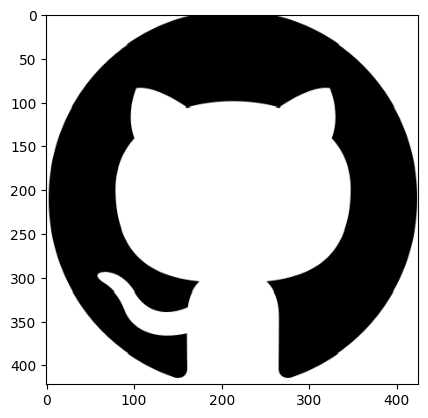

In [21]:
# Display image.
plt.imshow(img_2, cmap='gray')

### Working with color Images
* Until now, We have been using gray scale images in our discussion. Let us now discuss color images.

In [23]:
# Read in image
coka_img = cv2.imread('Images/cokacola.png', 1)

In [24]:
# Print the size of image
print("Image size (H, W, C) is:", coka_img.shape)

Image size (H, W, C) is: (2080, 2072, 3)


In [25]:
# Print data-type of image
print("Data-type of image is:", coka_img.dtype)

Data-type of image is: uint8


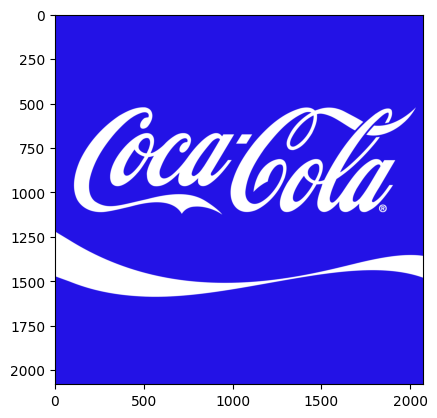

In [26]:
# Display the image
plt.imshow(coka_img)

## Reason for not showing proper color
* The color displayed above is different from the actual image. This is bacause matplotlib expects the image in RGB format whereas OpenCV stores images in BGR format. Thus, for correct display, we need to reverse the channels of the image. We will discuse about the channels in the sections below. 

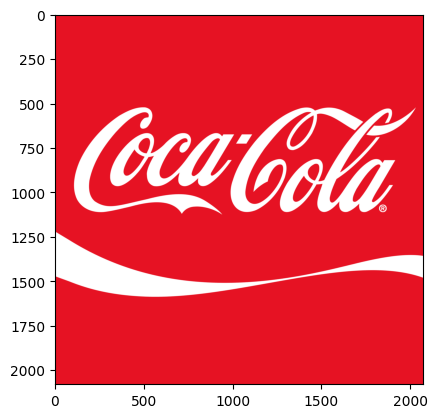

In [28]:
coka_img_reversed = coka_img[:, :, ::-1]
plt.imshow(coka_img_reversed)

# Splitting and Merging color channels
* cv2.split()  -  Divides a multi-channel array into severl single-channel arrays
* cv2.merge()  -  Merges several arrays to make a single multi-channel array. All the input matrices must have the same size.

#### Split the image into the B, G, R components

In [29]:
img_lake_bgr = cv2.imread("Images/lake.jpg", cv2.IMREAD_COLOR)
b, g, r = cv2.split(img_lake_bgr)

Text(0.5, 1.0, 'Blue Channel')

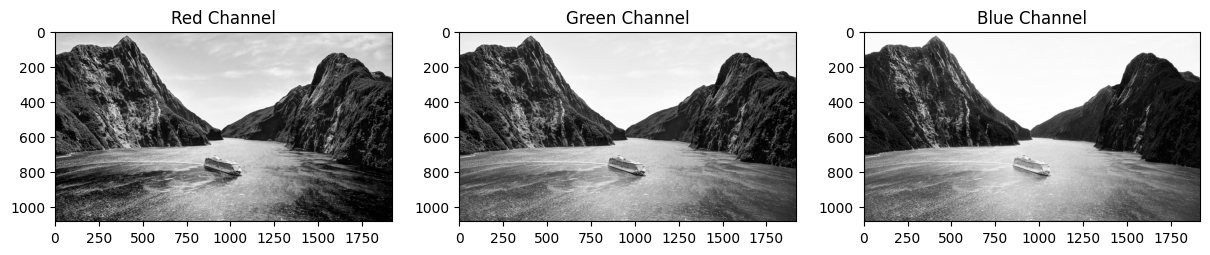

In [30]:
# Show the channels
plt.figure(figsize=[20, 5])

plt.subplot(141);plt.imshow(r, cmap='gray');plt.title("Red Channel")
plt.subplot(142);plt.imshow(g, cmap="gray");plt.title("Green Channel")
plt.subplot(143);plt.imshow(b, cmap="gray");plt.title("Blue Channel")

#### Merge the individual channels into a BGR image

In [31]:
imgMerged = cv2.merge((b, g, r))

Text(0.5, 1.0, 'Merged Output')

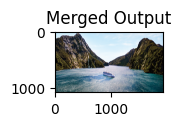

In [32]:
# Show the merged output
plt.subplot(144)
plt.imshow(imgMerged[:, :, ::-1])
plt.title("Merged Output")

# Converting to different Color Spaces
* **cv2.cvtColor()** - Converts an image from one color space to another. The function converts an input image from one color space to another. In case of a transformation to-from RGB color space, the order of the channels should be specified explacitly (RGB or BGR). Note that the default color format in openCV is often reffered to as RGB but it is actually BGR (the bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit lue components, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.
* dst = cv2.cvtColor(src, code)
* This function has 2 required arguments:
* 1. src input image: 8-bit unsigned, 16-bit unsigned ( cv_16UC.. ), or single-precision floating-point.
* 2. code: color space conversion code (see ColorConversionCodes).

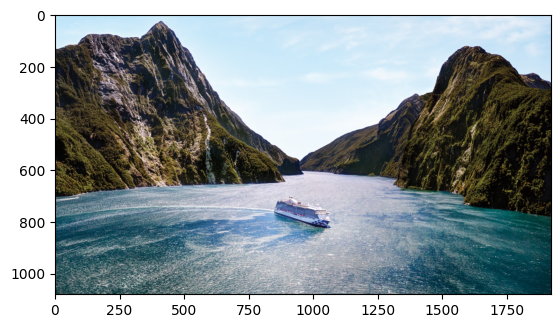

In [34]:
# openCV stores color channels in a different order than most other applications (BGR vs RGB)
img_lake_rgb = cv2.cvtColor(img_lake_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_lake_rgb)

#### Channging to HSV color space

In [35]:
img_hsv = cv2.cvtColor(img_lake_bgr, cv2.COLOR_BGR2HSV)

#### Splt the image into the B, G, R components

In [36]:
h, s, v = cv2.split(img_hsv)

Text(0.5, 1.0, 'Original')

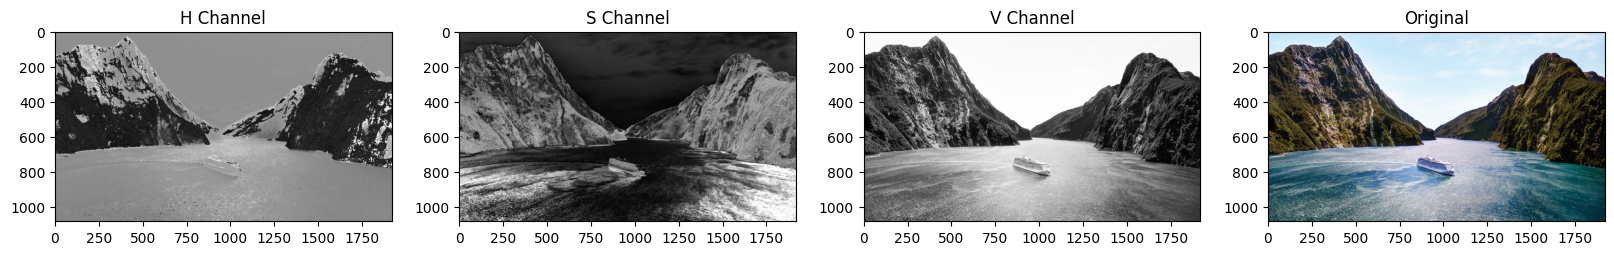

In [37]:
# Show the channels
plt.figure(figsize=[20, 5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel")
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel")
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel")
plt.subplot(144);plt.imshow(img_lake_rgb); plt.title("Original")

In [38]:
# Modifying individual channel
h_new = h + 10
img_lake_merged = cv2.merge((h_new, s, v))
img_lake_rgb = cv2.cvtColor(img_lake_merged, cv2.COLOR_HSV2RGB)

Text(0.5, 1.0, 'Original')

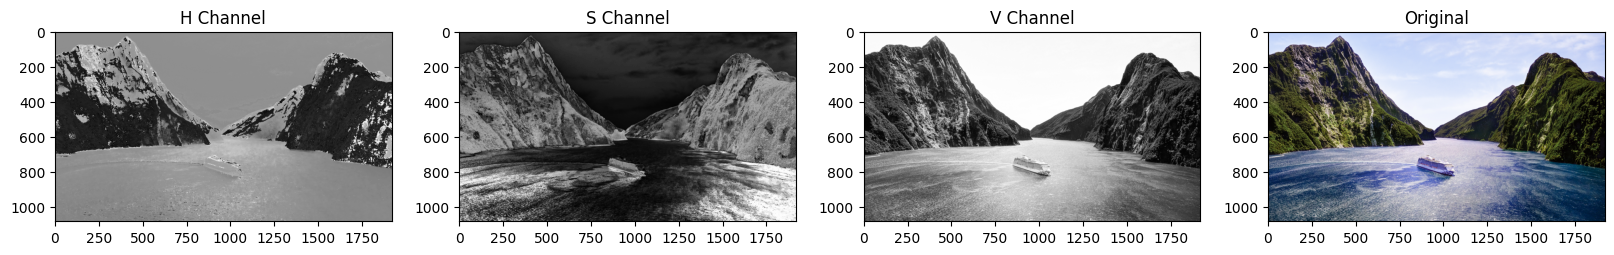

In [39]:
# Show the channels
plt.figure(figsize=[20, 5])
plt.subplot(141);plt.imshow(h, cmap="gray");plt.title("H Channel")
plt.subplot(142);plt.imshow(s, cmap="gray");plt.title("S Channel")
plt.subplot(143);plt.imshow(v, cmap="gray");plt.title("V Channel")
plt.subplot(144);plt.imshow(img_lake_rgb); plt.title("Original")

# Saving Images
* Saving the image is as trivial as reading an image in OpenCV. We use the function **cv2.imwrite()** with two arguments. The first one is the filename, second argument is the image object. 
* The function imwrite saves the image to the specified file. The image format is chosen based on the filename extension (see cv::imread for the list of extensions). In general, only 8-bit single-channel or 3-channel(with 'BGR' channel order) images can be saved using this function (see OpenCV documentation for further details).
* **cv2.imwrite(filename, img[, params])**
* The function has 2 required arguments:
* 1. filename: This can be an **absolute** or **relative** path.
* 2. img: Image or Images to be saved

## Save the image

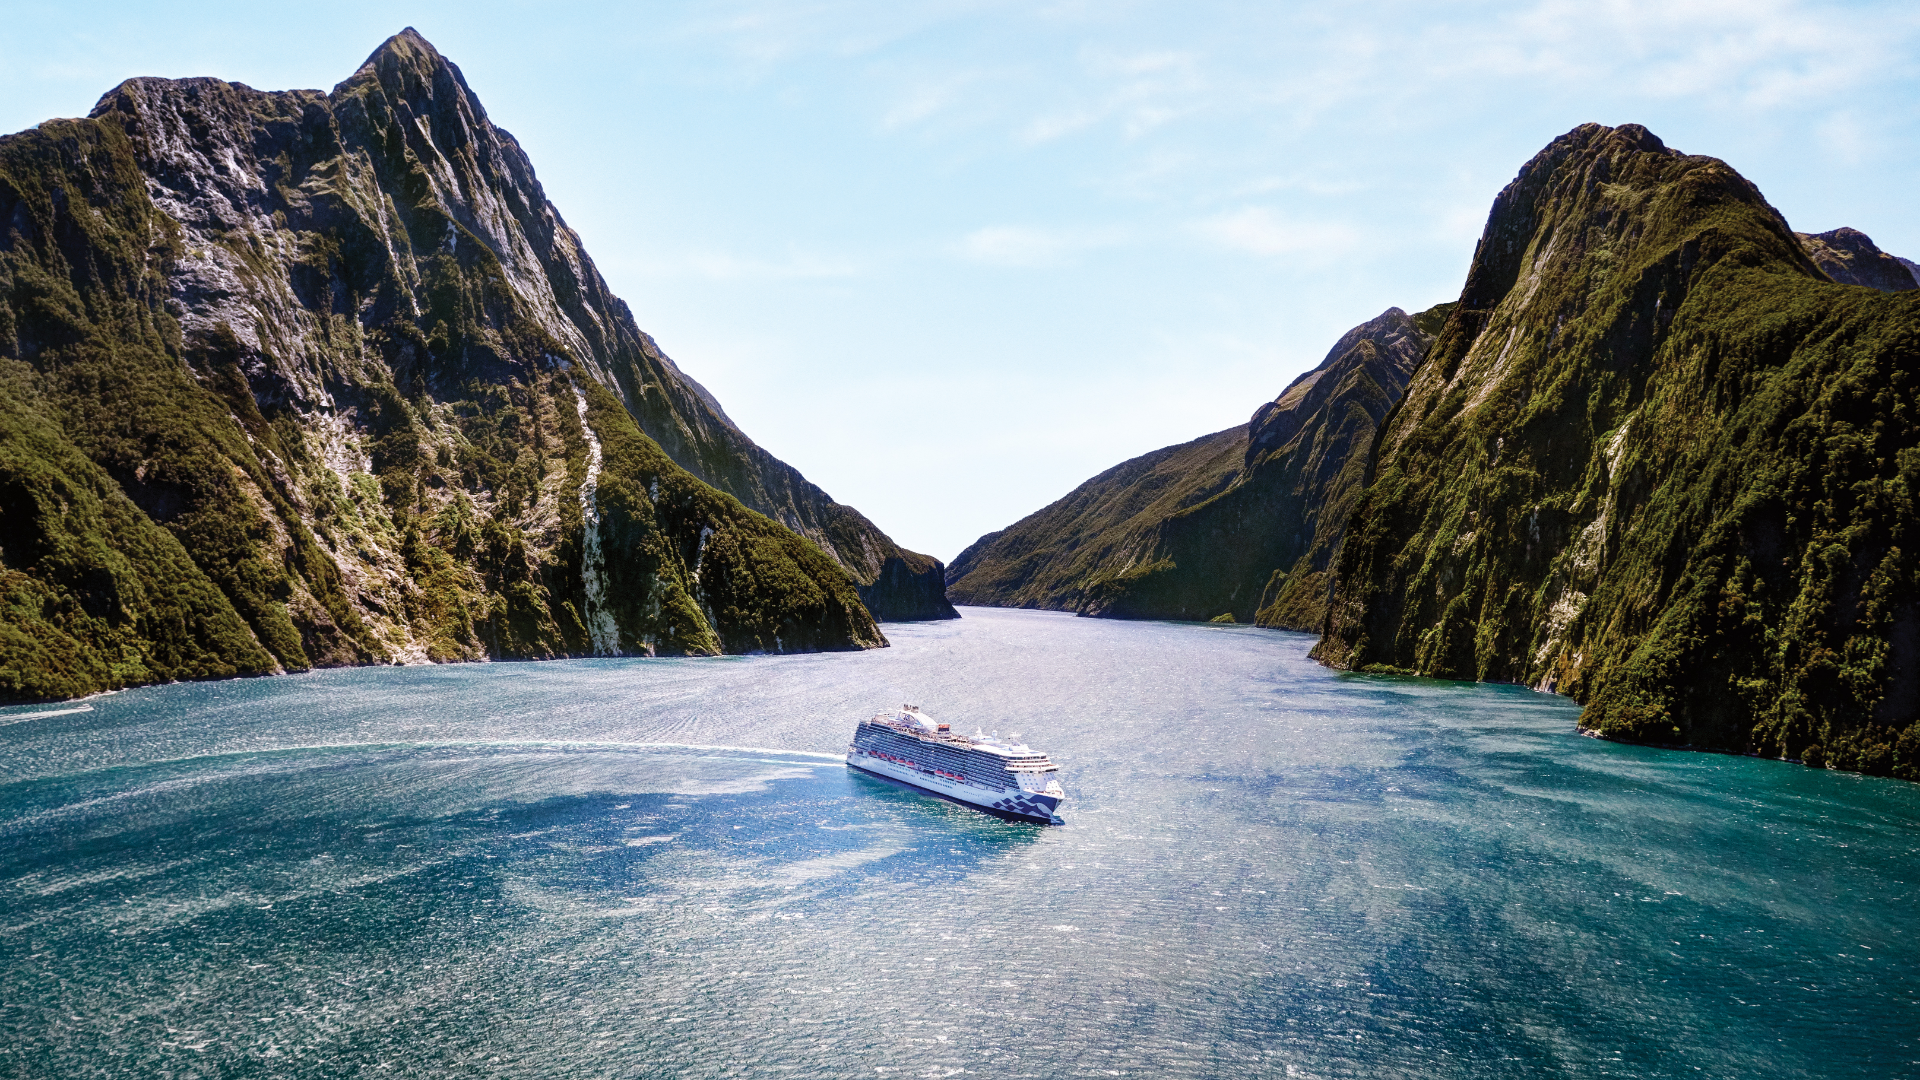

In [41]:
cv2.imwrite("Lake_New_Saved.png", img_lake_bgr)
Image(filename="Lake_New_Saved.png")

#### Read the image as color

In [43]:
new_bgr = cv2.imread("Lake_New_Saved.png", cv2.IMREAD_COLOR)
print("Lake_New_Saved shape (H, W, C) is:", new_bgr.shape)

Lake_New_Saved shape (H, W, C) is: (1080, 1920, 3)


#### Read the image as Grayscale

In [45]:
new_img_gry = cv2.imread("Lake_New_Saved.png", cv2.IMREAD_GRAYSCALE)
print("new_img_gry shape (H, W) is:", new_img_gry.shape)

new_img_gry shape (H, W) is: (1080, 1920)
